<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


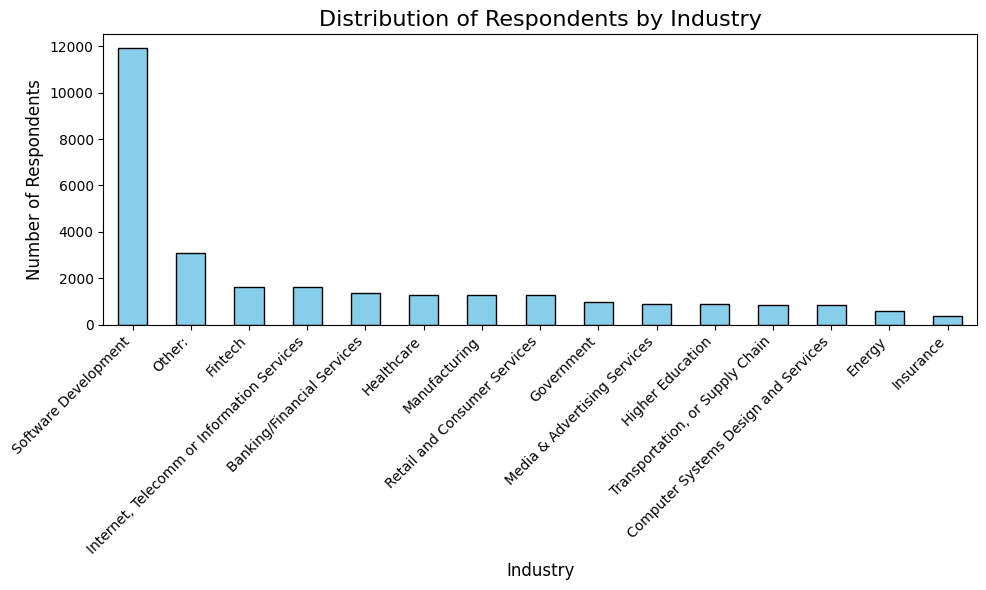

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


In [3]:
##Write your code here
import matplotlib.pyplot as plt

# Step 1: Get the count of respondents in each industry
industry_counts = df['Industry'].value_counts()

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Respondents by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Print the distribution (optional)
print(industry_counts)


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
import numpy as np

# Step 1: Calculate basic statistics for ConvertedCompYearly
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

# Step 2: Define the threshold for high compensation
threshold = mean_comp + 3 * std_comp

# Step 3: Identify respondents with compensation exceeding the threshold (outliers)
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

# Print the basic statistics
print(f"Mean Compensation: {mean_comp}")
print(f"Median Compensation: {median_comp}")
print(f"Standard Deviation: {std_comp}")
print(f"High Compensation Threshold (3 SD above the mean): {threshold}")
print(f"Number of respondents with high compensation outliers: {len(high_comp_outliers)}")

# Optionally, display the outliers
print("High Compensation Outliers:")
print(high_comp_outliers[['ConvertedCompYearly']].head())  # Displaying a preview


Mean Compensation: 86155.28726264134
Median Compensation: 65000.0
Standard Deviation: 186756.97308629757
High Compensation Threshold (3 SD above the mean): 646426.2065215341
Number of respondents with high compensation outliers: 89
High Compensation Outliers:
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of outliers: 978


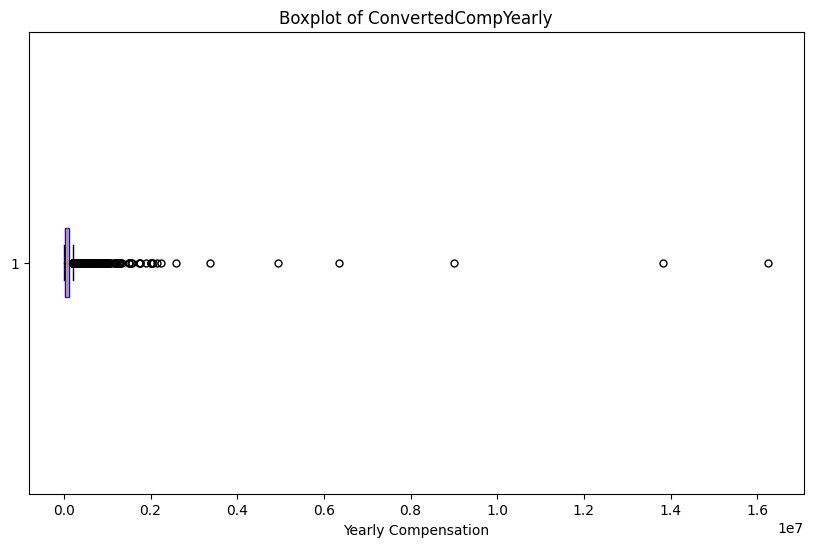

Outliers in ConvertedCompYearly:
     ConvertedCompYearly
428             230000.0
456             300000.0
461             254425.0
529             650000.0
545             400000.0


In [5]:
##Write your code here
import matplotlib.pyplot as plt

# Step 1: Calculate the IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count of outliers
num_outliers = len(outliers)

# Print statistics
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {num_outliers}")

# Step 4: Visualize the distribution and outliers with a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Boxplot of ConvertedCompYearly')
plt.xlabel('Yearly Compensation')
plt.show()

# Optionally, display the outliers
print("Outliers in ConvertedCompYearly:")
print(outliers[['ConvertedCompYearly']].head())  # Displaying a preview


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Step 1: Calculate the IQR (if not already calculated)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Create a new DataFrame excluding outliers in ConvertedCompYearly
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 4: Validate the size of the new DataFrame
original_size = df.shape
new_size = df_no_outliers.shape

# Print the original and new sizes
print(f"Original DataFrame size: {original_size}")
print(f"New DataFrame size after removing outliers: {new_size}")


Original DataFrame size: (65437, 114)
New DataFrame size after removing outliers: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


/opt/conda/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


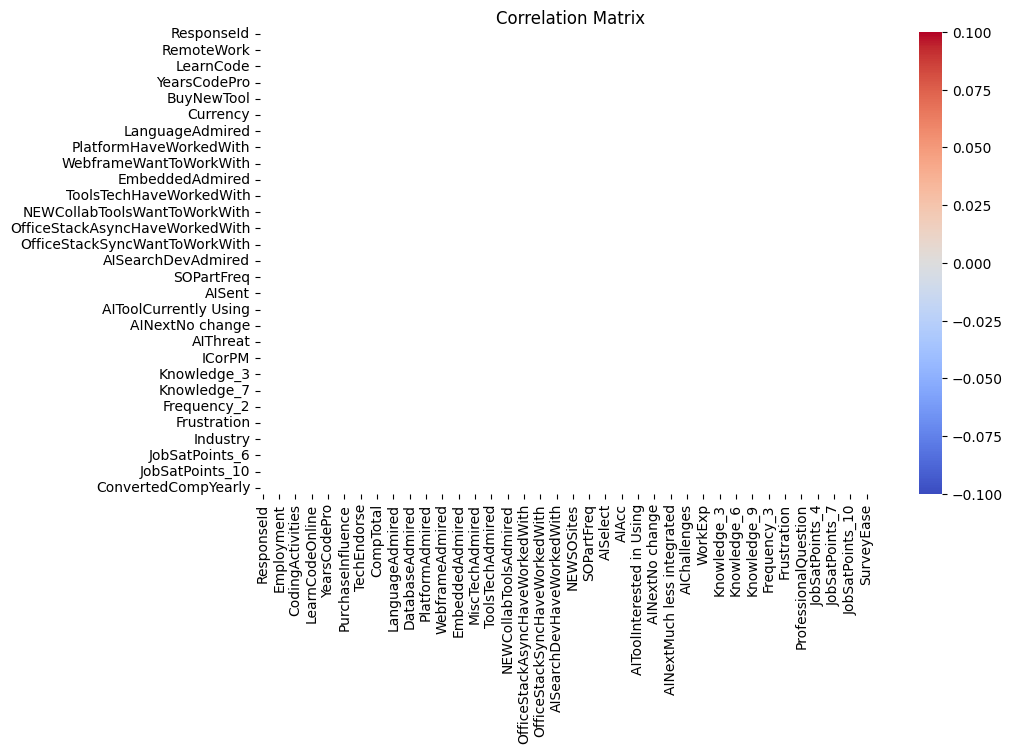

In [9]:
# Check for missing values
print(df.isnull().sum())
# Drop rows with missing values in the 'Age' column or any other relevant columns
df = df.dropna(subset=['Age'])
# Fill missing values with the median of the column (for numeric columns)
df['Age'] = df['Age'].fillna(df['Age'].median())
# Step 1: Check for missing values in the dataset
print(df.isnull().sum())

# Step 2: Handle missing values
# Drop rows with missing values in the 'Age' column or any other relevant columns
df = df.dropna(subset=['Age'])

# Step 3: Map the 'Age' column to numeric values again if necessary
age_mapping = {
    '18-24': 21,  # mid-point of the age range
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65+': 70
}

df['Age'] = df['Age'].map(age_mapping)  # Replace age range with numeric value

# Step 4: Compute correlation between Age and other numeric columns
correlation_matrix = df.corr()

# Step 5: Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
